In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# from math import cos, sin
# import matplotlib.animation as animation

random.seed(1)

plt.rcParams["figure.figsize"] = (10, 5)

%load_ext autoreload
%autoreload 2

In [2]:
WORLD_SIZE = 250
INITIAL_POPULATION = 1000

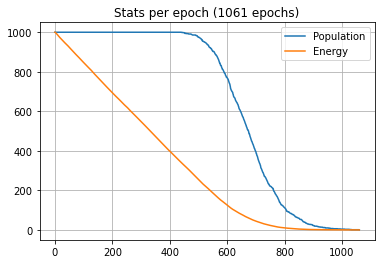

In [3]:
from src.world import World

world = World(WORLD_SIZE, WORLD_SIZE)
for _ in range(INITIAL_POPULATION):
    location, _ = world.spawn(0)

population_size = []
avg_energy = []

while len(world.locations) > 0:
    world.step()

    population_size.append(world.alive)

    total_energy = 0
    for being in world.locations.values():
        total_energy += being.energy

    avg_energy.append(total_energy)

plt.title(f'Stats per epoch ({len(population_size)} epochs)')
plt.plot(population_size, label='Population')
plt.plot(avg_energy, label='Energy')
plt.grid()
plt.legend()
plt.show()

vision_pixel_size 9
angles 247.5 292.5
(1, 0.5) 27
(-0.8, -0.5) 212
(-0.1, -0.6) 261
  chunk: 1 0.6082762530298219
(-0.67, 0.2) 163

Vision array (shows a 1 when there is a being within viewing distance in that direction)
[0, 1, 0, 0, 0]


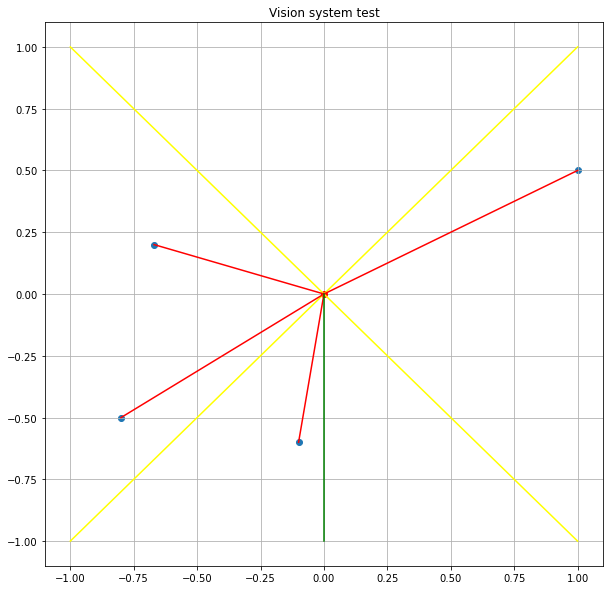

In [64]:
import math

# Vision model

vision_angle = 45
vision_pixels = 5
vision_distance = 1

vision_pixel_size = vision_angle // vision_pixels

print('vision_pixel_size', vision_pixel_size)

# Test data
main = (0, 0)
direction = [0, -1]

beings_x = [1, -0.8, -0.1, -0.67]
beings_y = [0.5, -0.5, -0.6, 0.2]

# Vision calculations

direction_angle = math.degrees(math.atan2(direction[1], direction[0]))
vision_line = (
    main[0] + direction[0] * vision_distance,
    main[1] + direction[1] * vision_distance,
)

# calculate angles between the main being and each of the others
# the ones that are within +- 45 degrees + within the distance are "visible"
# either this or we ray trace (calculate equations for the lines and see if any being falls within it)
# and then use the distance for the color

# the issue with the ray tracing is that as we get further, they'll be far from the lines
# I think it'll be best to do the angle thing, and then map angles to pixels of vision

min_angle = direction_angle - vision_angle / 2
max_angle = direction_angle + vision_angle / 2

min_angle %= 360
max_angle %= 360

# min_angle = min_angle - 360 if min_angle > 180 else min_angle
# max_angle = max_angle - 360 if max_angle > 180 else max_angle

print('angles', min_angle, max_angle)

vision = [0] * vision_pixels

for coords in zip(beings_x, beings_y):
    # angle between two points:
    # project each coord to the x/y axis
    # PI = 180
    # xx = x

    y = coords[1] - main[1]
    x = coords[0] - main[0]

    angle = math.atan2(y, x)
    angle_deg = math.degrees(angle)
    angle_deg %= 360

    print(coords, round(angle_deg))

    if min_angle <= angle_deg <= max_angle:
        dist = math.hypot(x, y)
        if dist <= vision_distance:
            # visible
            vision_chunk = int((angle_deg - min_angle) // vision_pixel_size)
            vision[vision_chunk] += 1

            print('  chunk:', vision_chunk, dist)
        else:
            print('  Too far')

print()
print('Vision array (shows a 1 when there is a being within viewing distance in that direction)')
print(vision)

plt.rcParams["figure.figsize"] = (10, 10)

plt.title('Vision system test')
plt.scatter(beings_x, beings_y)
plt.plot([main[0]], [main[1]], marker='o', color='red')

# Draw some axis to make it easier to "debug"
plt.plot([main[0], -1], [main[1], -1], color='yellow')
plt.plot([main[0], 1], [main[1], 1], color='yellow')
plt.plot([main[0], 1], [main[1], -1], color='yellow')
plt.plot([main[0], -1], [main[1], 1], color='yellow')

for coord in zip(beings_x, beings_y):
    plt.plot([main[0], coord[0]], [main[1], coord[1]], color='red')

plt.plot([main[0], main[0] + direction[0] * vision_distance], [main[1], main[1] + direction[1] * vision_distance], color='green')

plt.grid()
plt.show()